In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!ls

6.MovieRecommandationProject.html
6.MovieRecommandationProject.ipynb
6.MovieRecommandationProject.pdf
Movie_Recommend_Maj_Proj.ipynb
ml-100k
project.png


In [3]:
!ls ml-100k/

README
allbut.pl
mku.sh
u.data
u.genre
u.info
u.item
u.occupation
u.user
u1.base
u1.test
u2.base
u2.test
u3.base
u3.test
u4.base
u4.test
u5.base
u5.test
ua.base
ua.test
ub.base
ub.test


In [4]:
!head ml-100k/README

SUMMARY & USAGE LICENSE

MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. 
        * Simple demographic info for the users (age, gender, occupation, zip)


In [5]:
!head ml-100k/u.data

196	242	3	881250949
186	302	3	891717742
22	377	1	878887116
244	51	2	880606923
166	346	1	886397596
298	474	4	884182806
115	265	2	881171488
253	465	5	891628467
305	451	3	886324817
6	86	3	883603013


In [6]:
data=pd.read_csv('ml-100k/u.data',header=None,names=['user_id','movie_id','rating'],sep='\t',usecols=[0,1,2])

In [7]:
data.head()

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


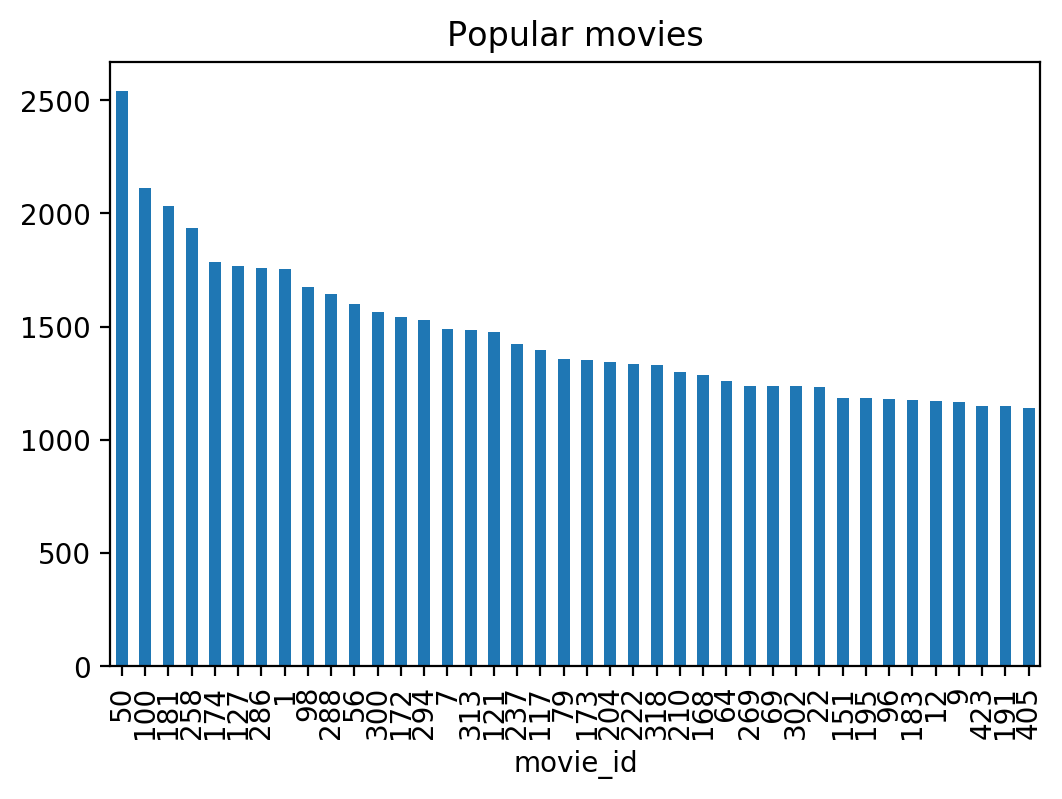

In [10]:
fig,ax=plt.subplots(dpi=200)
plt.title('Popular movies')
data.groupby('movie_id')['rating'].sum().sort_values(ascending=False)[:40].plot(kind='bar')
plt.show()

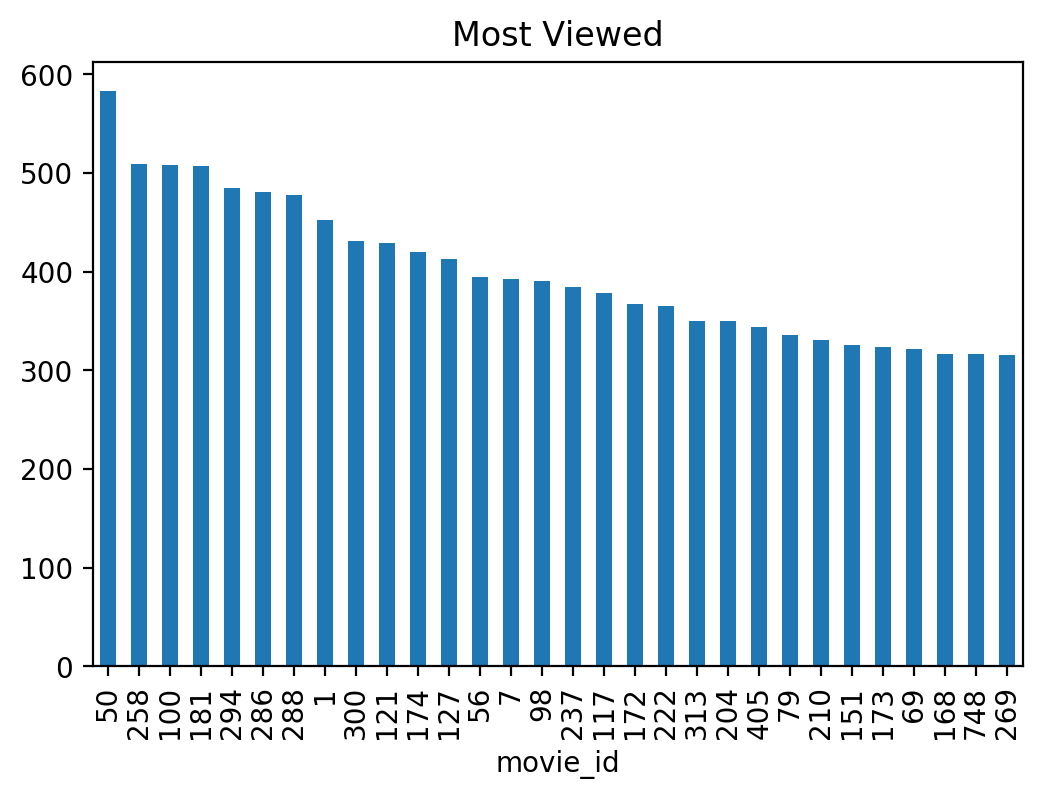

In [14]:
fig, ax =plt.subplots(dpi=200)
plt.title('Most Viewed')
data.groupby('movie_id')['user_id'].count().sort_values(ascending=False)[:30].plot(kind='bar')
plt.show()

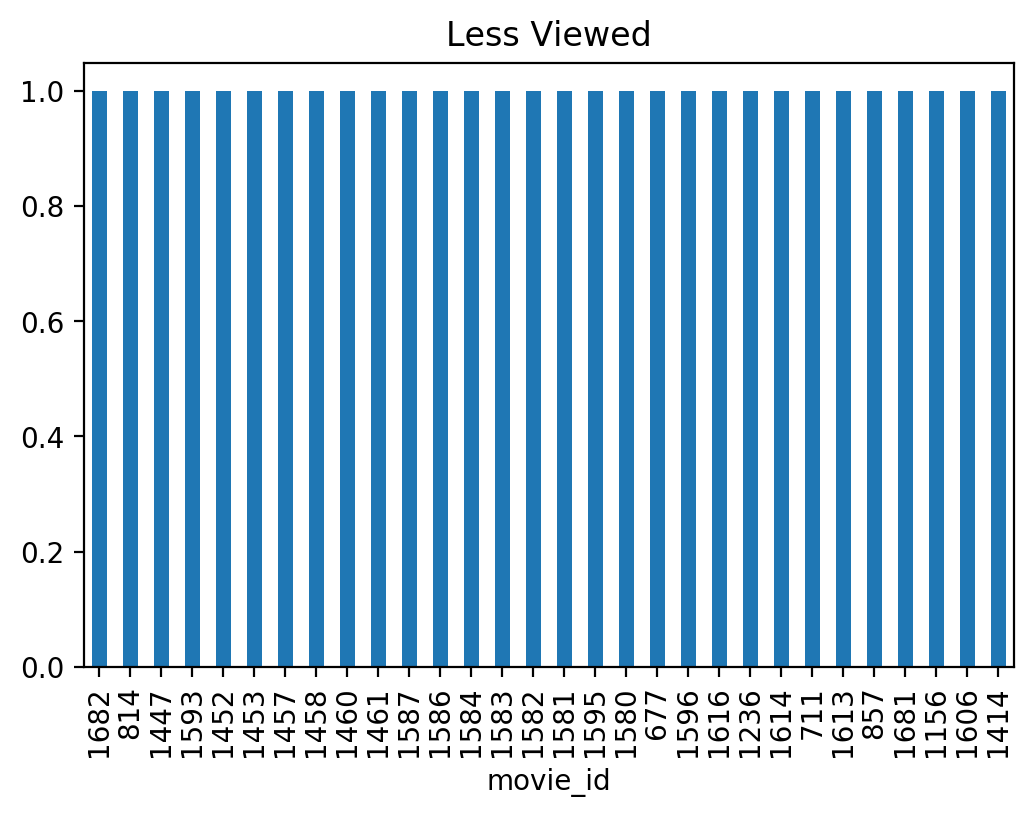

In [15]:
fig, ax =plt.subplots(dpi=200)
plt.title('Less Viewed')
data.groupby('movie_id')['user_id'].count().sort_values()[:30].plot(kind='bar')
plt.show()

In [16]:
most_viewed=data.groupby('movie_id')['user_id'].count()

In [18]:
most_viewed.describe()

count    1682.000000
mean       59.453032
std        80.383846
min         1.000000
25%         6.000000
50%        27.000000
75%        80.000000
max       583.000000
Name: user_id, dtype: float64

Highly Scattered data

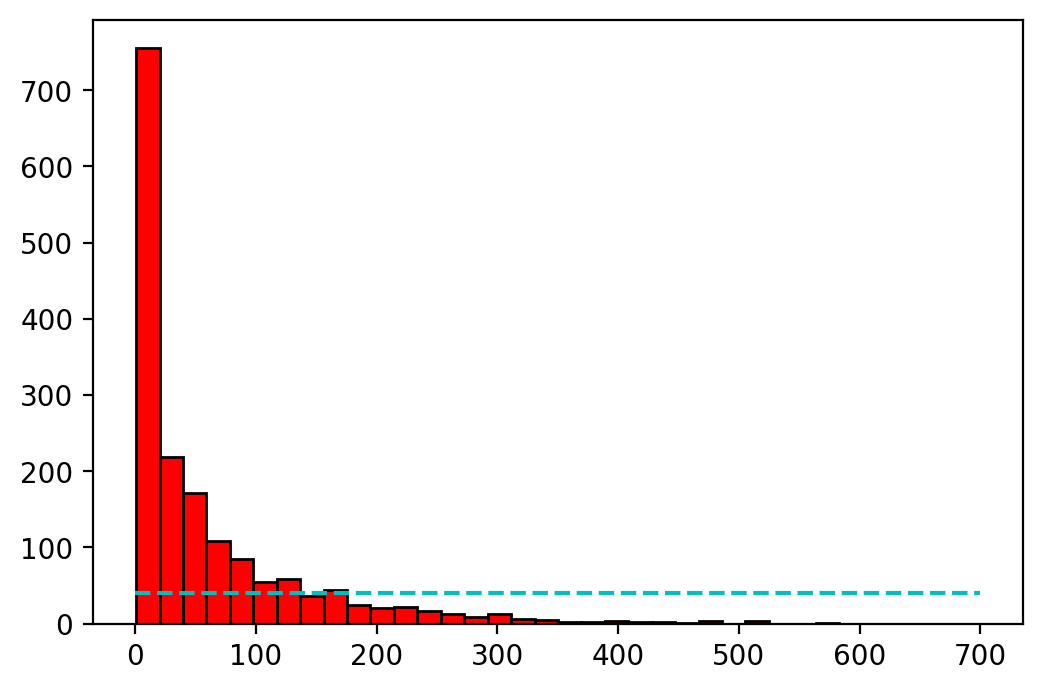

In [27]:
plt.figure(dpi=200)
plt.hist(most_viewed,color='red',bins=30,ec='k')
plt.plot([0,700],[40,40],'c--')
plt.show()

In [28]:
data

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


In [30]:
df=data.set_index('movie_id').drop('user_id',axis=1)

In [31]:
df

,rating
movie_id,
242,3
302,3
377,1
51,2
346,1
...,...
476,3
204,5
1090,1


In [32]:
df1=data.groupby('movie_id').agg({'user_id':np.size})

In [33]:
df1

,user_id
movie_id,
1,452
2,131
3,90
4,209
5,86
...,...
1678,1
1679,1
1680,1


In [34]:
data.shape

(100000, 3)

In [35]:
df.shape

(100000, 1)

In [36]:
df1.shape

(1682, 1)

In [37]:
df1=df1[df1['user_id']>25]

In [38]:
df1.shape

(858, 1)

In [40]:
df1.columns=['views']

In [41]:
df1.head()

,views
movie_id,
1,452
2,131
3,90
4,209
5,86


In [43]:
df1.min()

views    26
dtype: int64

In [44]:
df1.max()

views    583
dtype: int64

We will now apply normalization on views

In [46]:
mn=df1['views'].min()
mx=df1['views'].max()
df1['popularity'] = df1['views'].apply( lambda value: ( ( value - mn ) / ( mx - mn ) ) )


C:\Users\Deepali Verma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
df1.head()

,views,popularity
movie_id,,
1,452,0.764811
2,131,0.188510
3,90,0.114901
4,209,0.328546
5,86,0.107720


In [48]:
df1.drop('views',axis=1,inplace=True)

C:\Users\Deepali Verma\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [49]:
df1.head()

,popularity
movie_id,
1,0.764811
2,0.188510
3,0.114901
4,0.328546
5,0.107720


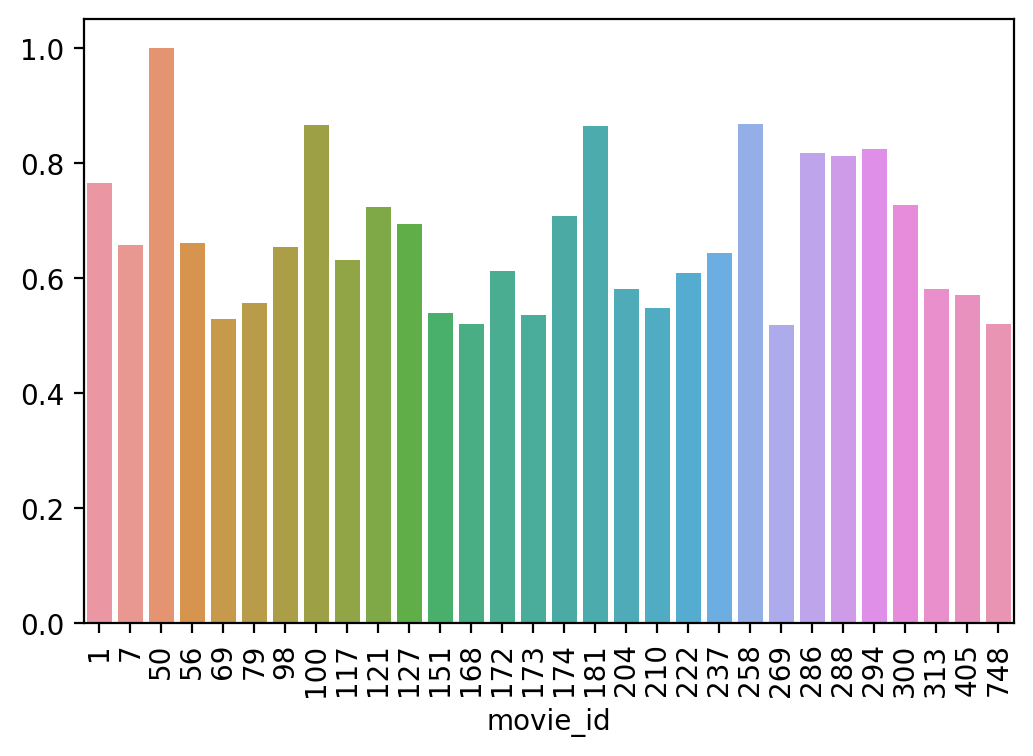

In [51]:
ms=df1['popularity'].sort_values(ascending=False)[:30]
plt.figure(dpi=200)
sns.barplot(ms.index,ms.values)
plt.xticks(rotation=90)
plt.show()

In [52]:
df1.head()

,popularity
movie_id,
1,0.764811
2,0.188510
3,0.114901
4,0.328546
5,0.107720


In [53]:
df.head()

,rating
movie_id,
242,3
302,3
377,1
51,2
346,1


In [54]:
rating=pd.merge(df,df1,on='movie_id')

In [55]:
rating.head()

,rating,popularity
movie_id,,
242,3,0.163375
242,3,0.163375
242,5,0.163375
242,3,0.163375
242,5,0.163375


In [56]:
df.shape

(100000, 1)

In [57]:
df1.shape

(858, 1)

In [58]:
rating.shape

(93146, 2)

In [62]:
rating.loc[50,].head()

,rating,popularity
movie_id,,
50,5,1.0
50,4,1.0
50,5,1.0
50,5,1.0
50,5,1.0


In [65]:
rating=rating.groupby(level=0).agg({
    'rating':np.mean,
    'popularity':np.mean
})

In [66]:
rating.head()

,rating,popularity
movie_id,,
1,3.878319,0.764811
2,3.206107,0.188510
3,3.033333,0.114901
4,3.550239,0.328546
5,3.302326,0.107720


In [69]:
!head ml-100k/u.item

1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0
5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0
6|Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)|01-Jan-1995||http://us.imdb.com/Title?Yao+a+yao+yao+dao+waipo+qiao+(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0
7|Twelve Monkeys (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Twelve%20Monkeys%20(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|1|0|0|0
8|Babe (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Babe%20(1995)|0|0|0|0|1

In [71]:
!head ml-100k/u.genre

unknown|0
Action|1
Adventure|2
Animation|3
Children's|4
Comedy|5
Crime|6
Documentary|7
Drama|8
Fantasy|9


In [73]:
names = [ 'movie_id', 'movie title', 'Action', 'Adventure', 'Animation',
"Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy",
"Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi",
"Thriller", "War", "Western" ]
cols = [ 0, 1, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,23]


In [76]:
movie=pd.read_csv('ml-100k/u.item',header=None,sep='|',encoding='latin1',names=names,usecols=cols,index_col='movie_id')

In [77]:
movie.head()

,movie title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [78]:
movie.shape

(1682, 19)

In [80]:
movie_name=movie[['movie title']]

In [81]:
movie_name.head()

,movie title
movie_id,
1,Toy Story (1995)
2,GoldenEye (1995)
3,Four Rooms (1995)
4,Get Shorty (1995)
5,Copycat (1995)


In [82]:
movie_name.loc[50]

movie title    Star Wars (1977)
Name: 50, dtype: object

In [84]:
movie_name.loc[17]

movie title    From Dusk Till Dawn (1996)
Name: 17, dtype: object

In [85]:
movie.drop('movie title',axis=1,inplace=True)

In [86]:
movie.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [87]:
features=pd.merge(rating,movie,on='movie_id')

In [88]:
features.head()

,rating,popularity,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,
1,3.878319,0.764811,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.206107,0.188510,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3.033333,0.114901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3.550239,0.328546,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,3.302326,0.107720,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


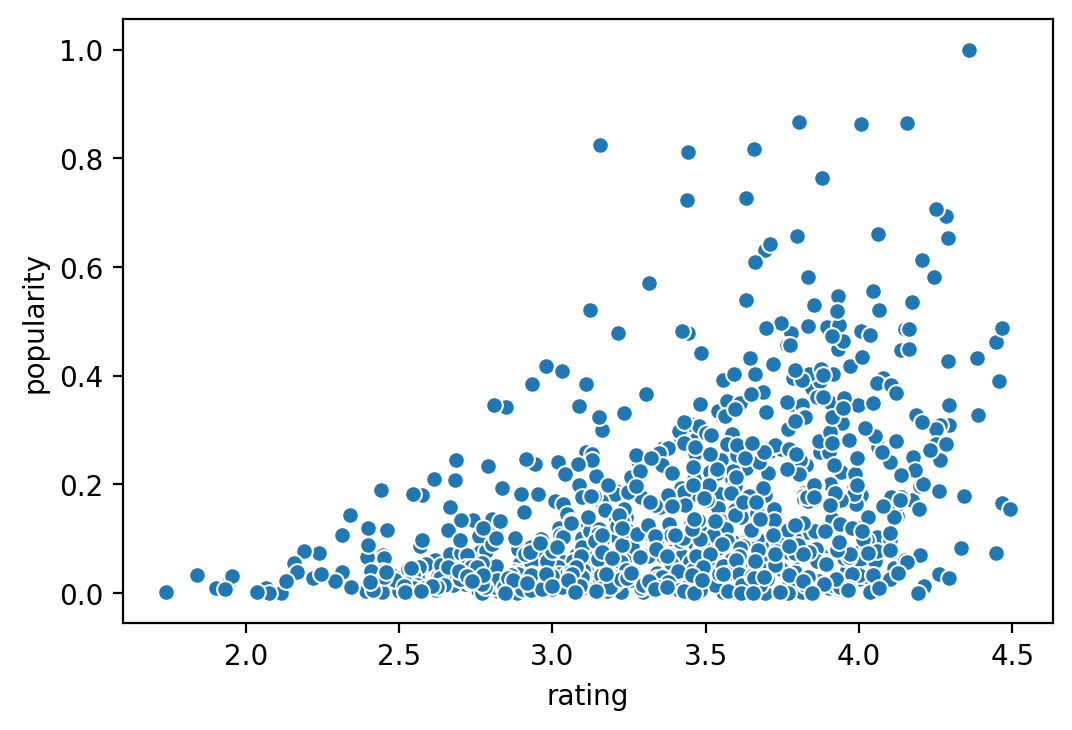

In [89]:
plt.figure(dpi=200)
sns.scatterplot('rating','popularity',data=features)
plt.show()

In [90]:
np.corrcoef(features['rating'],features['popularity'])

array([[1.        , 0.40816709],
       [0.40816709, 1.        ]])

In [91]:
from scipy.spatial.distance import euclidean,cosine

In [92]:
m1=features.loc[50]

In [93]:
m2=features.loc[6]

In [95]:
euclidean(m1,m2)

2.7587764933102124

In [96]:
cosine(m1,m2)

0.16043261677394638

In [99]:
euclidean(m1[:2],m2[:2])

1.2691917664565082

In [101]:
cosine(m1[:2],m2[:2])

0.02532513192802055

In [102]:
euclidean(m1[2:],m2[2:])

2.449489742783178

In [103]:
cosine(m1[2:],m2[2:])

1.0

In [104]:
cosine(m1[2:],m2[2:]) + euclidean(m1[:2],m2[:2])

2.269191766456508

In [105]:
target=movie_name

In [106]:
target.head()

,movie title
movie_id,
1,Toy Story (1995)
2,GoldenEye (1995)
3,Four Rooms (1995)
4,Get Shorty (1995)
5,Copycat (1995)


In [107]:
def distance(mid_1,mid_2):
    m1=features.loc[mid_1]
    m2=features.loc[mid_2]
    rp_dist=euclidean(m1[:2],m2[:2])
    genr_dist=cosine(m1[2:],m2[2:])
    return rp_dist + genr_dist

In [108]:
distance(50,6)

2.269191766456508

In [109]:
distance(3,50)

2.593562511080913

In [113]:
def similar_movie_sugg(mid,k=6):
    neighbours=[]
    for new_id in features.index:
        if mid!= new_id:
            d=distance(mid,new_id)
            name=movie_name.loc[new_id]['movie title']
            neighbours.append((d,name))
    neighbours.sort()
    return [name for d,name in neighbours[:k]]
            

In [114]:
similar_movie_sugg(50,k=10)

['Return of the Jedi (1983)',
 'Empire Strikes Back, The (1980)',
 'Raiders of the Lost Ark (1981)',
 'Princess Bride, The (1987)',
 'African Queen, The (1951)',
 'Titanic (1997)',
 'Indiana Jones and the Last Crusade (1989)',
 'Aliens (1986)',
 'Star Trek: First Contact (1996)',
 'Braveheart (1995)']

In [116]:
similar_movie_sugg(199)

['Henry V (1989)',
 'Killing Fields, The (1984)',
 'Apocalypse Now (1979)',
 'Ran (1985)',
 'Patton (1970)',
 'Paths of Glory (1957)']